 # Knjige
 
Projekt z naslovom Knjige za predmet programiranje 1 z namenom analize ocen knjig in pisateljev.
 
 
 ## Priprava podatkov:
 
S spletne strani www.goodreads.com poberemo podatke za najboljše knjige po stoletjih. Ti podatki zajemajo:
 * naslov knjige,
 * leto prve izdaje,
 * pisatelja,
 * povprečno oceno uporabnikov spletne strani,
 * vrstni red, ki so dosegle na strani.
 
Poleg teh podatkov poberemo tudi naslednje:
 * zvrst knjige,
 * naslov,
 * leto nagrade,
ki pa zajemajo knjige, ki so prejele nagrado za najboljšo knjigo svoje zvrsti v posameznem letu 2010 - 2014.
 
Podatke shranimo v dve CSV datoteki, ki sta v mapi csv_datoteke.
 
Zatem naložimo paket in 2 tabeli. 

In [2]:
import pandas as pd

pd.options.display.max_rows = 12
pd.options.display.max_columns = 12

nagrade = pd.read_csv('csv-datoteke/knjige-nagrade.csv',index_col='Naslov')
stoletja = pd.read_csv('csv-datoteke/knjige.csv',index_col='Naslov')


Podatke smo že prej prečistili s pomočjo modula html in funkcije unescape, zato da se bodo naslovi knjig res ujemali, saj je to edini podatek, ki povezuje obe tabeli.
Spodaj je del obeh tebel:

In [3]:
nagrade[:40]

,Leto_nagrade,Zvrst
Naslov,,
Mockingjay,2010,Favorite Book of 2010
Room,2010,Fiction
The Girl Who Kicked the Hornet's Nest,2010,Mystery & Thriller
Towers of Midnight,2010,Fantasy
Dead in the Family,2010,Paranormal Fantasy
Feed,2010,Science Fiction
...,...,...
My Father's Daughter,2011,Best History & Biography
Little Princes,2011,Best Memoir & Autobiography


In [4]:
stoletja

,Vrstni_red,Pisatelj,Leto_izdaje,Ocena
Naslov,,,,
The Canterbury Tales,1,Geoffrey Chaucer,1390,3.47
The Divine Comedy,2,Dante Alighieri,1320,4.05
Inferno,3,Dante Alighieri,1304,3.98
The Decameron,4,Giovanni Boccaccio,1348,3.86
Sir Gawain and the Green Knight,5,Unknown,1390,3.68
Paradiso,6,Dante Alighieri,1321,3.93
...,...,...,...,...
God Is Not Great: How Religion Poisons Everything,95,Christopher Hitchens,2007,3.94
Anansi Boys,96,Neil Gaiman,2005,3.99


# Analiza podatkov:



## Ocene knjig po stoletjih:

Najprej bomo analizirali podatke o knjigah po stoletjih. Ogledali si bomo povprečne ocene glasovanja za najboljšo knjigo stoletja. Najprej dodamo v našo tabelo še en stolpec, v katerem dodamo stoletje v katerem je bila knjiga izdana.
Spodaj vidimo prikaz te tabele.

Poleg tega izračunamo še povprečne ocene knjig po stoletjih. Najprej jih prikažemo, potem pa s pomočjo njih narišemo še graf. 


In [5]:
stoletja['Stoletje'] = (stoletja.Leto_izdaje // 100) + 1
stoletja

,Vrstni_red,Pisatelj,Leto_izdaje,Ocena,Stoletje
Naslov,,,,,
The Canterbury Tales,1,Geoffrey Chaucer,1390,3.47,14
The Divine Comedy,2,Dante Alighieri,1320,4.05,14
Inferno,3,Dante Alighieri,1304,3.98,14
The Decameron,4,Giovanni Boccaccio,1348,3.86,14
Sir Gawain and the Green Knight,5,Unknown,1390,3.68,14
Paradiso,6,Dante Alighieri,1321,3.93,14
...,...,...,...,...,...
God Is Not Great: How Religion Poisons Everything,95,Christopher Hitchens,2007,3.94,21
Anansi Boys,96,Neil Gaiman,2005,3.99,21


In [6]:
povprecje = stoletja.groupby('Stoletje').mean()
povprecje['Ocena']

Stoletje
13    3.820000
14    3.915909
15    3.853333
16    3.801341
17    3.699184
18    3.714124
19    3.907624
20    4.057500
21    4.007549
Name: Ocena, dtype: float64

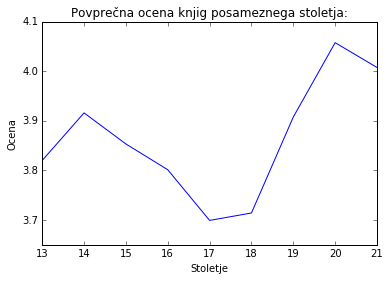

In [7]:
%matplotlib inline
povprecje['Ocena'].plot(title = 'Povprečna ocena knjig posameznega stoletja:').set_ylabel('Ocena')

Kot vidimo na grafu in na zgornjih podatkih o povprečni oceni, so bile knjige med 13. in 14. stoletjem v rasti. Iz tega obdobja prihajano različna dela, ki so prikazani na spodnji tabeli.

In [8]:
stoletja[stoletja.Stoletje == 14]

,Vrstni_red,Pisatelj,Leto_izdaje,Ocena,Stoletje
Naslov,,,,,
The Canterbury Tales,1,Geoffrey Chaucer,1390,3.47,14
The Divine Comedy,2,Dante Alighieri,1320,4.05,14
Inferno,3,Dante Alighieri,1304,3.98,14
The Decameron,4,Giovanni Boccaccio,1348,3.86,14
Sir Gawain and the Green Knight,5,Unknown,1390,3.68,14
Paradiso,6,Dante Alighieri,1321,3.93,14
...,...,...,...,...,...
The Divan,18,Hāfez,1380,4.63,14
Revelations of Divine Love,19,Julian of Norwich,1393,3.96,14


Kasneje so ocene padale, najslabše ocenjene knjige so bile v 17. stoletju. V tistem obdobju so pisali Shakespeare, Molière, Descartes, ki so sicer priznani pisatelji.
Po 18. stoletju, pa so se ocene knjig le dvigovale, z izjemo 21. stoletja, v katerem so ocene ponovno začele padati.

## Ocene knjig posameznega pisatelja:

 
Najprej ustvarimo tabelo pisateljev, ter njihovih ocen, ki so povprečna ocena vseh njegovih del.

In [9]:
a = stoletja.groupby('Pisatelj').mean()['Ocena'].sort_values(ascending = False)
a

Pisatelj
Heinrich Wittenwiler    5.000000
Hāfez                   4.630000
Patrick Rothfuss        4.550000
J.K. Rowling            4.504286
J.C. Wenger             4.500000
Founding Fathers        4.485000
                          ...   
Horace Walpole          3.170000
John Lyly               3.140000
Samuel Richardson       3.040000
Aphra Behn              2.960000
Pieter Langendijk       2.750000
Petar Zoranić           2.640000
Name: Ocena, dtype: float64

Na spodnjih dveh grafih vidimo prvih 30 najvišje ocenjenih pisateljev, ter njihove ocene.

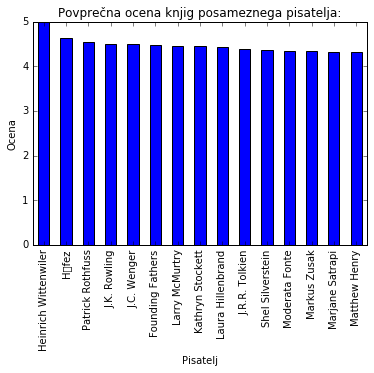

In [10]:
prvi_4 = a[:15].plot(kind='bar',title = 'Povprečna ocena knjig posameznega pisatelja:', y=(3,5.5)).set_ylabel('Ocena')

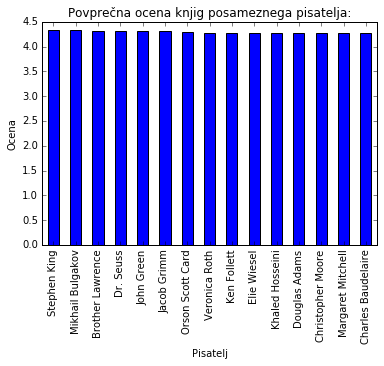

In [11]:
drugi_4 = a[15:30].plot(kind='bar',title = 'Povprečna ocena knjig posameznega pisatelja:').set_ylabel('Ocena')

##  Korelacije med ocenami:


Sedaj analiziramo še podatke iz druge tabele in ju združimo med seboj. S tem imamo še podatke o zvrsti ter prejeti nagradi.
Spodaj imamo to tabelo prikazano.

In [18]:
vsi = pd.merge(nagrade, stoletja,left_index='Naslov', right_index='Naslov', how ='outer')
vsi[10:40]

,Leto_nagrade,Zvrst,Vrstni_red,Pisatelj,Leto_izdaje,Ocena,Stoletje
Naslov,,,,,,,
A Dance with Dragons,2011.0,Best Mystery & Thriller,NaN,NaN,NaN,NaN,NaN
A Dictionary of the English Language: an Anthology,NaN,NaN,46.0,Samuel Johnson,1755.0,4.16,18.0
A Doll's House,NaN,NaN,58.0,Henrik Ibsen,1879.0,3.66,19.0
A Farewell to Arms,NaN,NaN,82.0,Ernest Hemingway,1929.0,3.78,20.0
A Journal of the Plague Year,NaN,NaN,39.0,Daniel Defoe,1722.0,3.54,18.0
A Journey to the Western Islands of Scotland and The Journal of a Tour to the Hebrides,NaN,NaN,80.0,Samuel Johnson,1775.0,3.52,18.0
...,...,...,...,...,...,...,...
Adventures in the Unknown Interior of America,NaN,NaN,75.0,Álvar Núñez Cabeza de Vaca,1542.0,3.61,16.0
Agnes Grey,NaN,NaN,97.0,Anne Brontë,1847.0,3.63,19.0


Večina knjig, ki je dosegla prvo mesto na podelitvi nagrad, ni prišla v izbor prvih 100 knjig stoletja. Tu se vidi različna merila med sodniki na podelitvi nagrad in med vsakdanjimi bralci, ki glasujejo na spletni strani.
V naslednji tabeli vidimo, da je le 8 knjig, ki imajo visoko uvrstitev na glasovanju in so dosegle prvo mesto na podelitvi nagrad Choice award. 

In [19]:
vsi = pd.merge(nagrade, stoletja,left_index='Naslov', right_index='Naslov', how ='outer')
skupni = vsi.dropna(axis=0, how='any')
skupni

,Leto_nagrade,Zvrst,Vrstni_red,Pisatelj,Leto_izdaje,Ocena,Stoletje
Naslov,,,,,,,
Divergent,2011.0,Favorite Hero,24.0,Veronica Roth,2011.0,4.28,21.0
Divergent,2011.0,Best Travel & Outdoors,24.0,Veronica Roth,2011.0,4.28,21.0
Gone Girl,2012.0,Best Goodreads Author,79.0,Gillian Flynn,2012.0,4.00,21.0
Mockingjay,2010.0,Favorite Book of 2010,18.0,Suzanne Collins,2010.0,4.03,21.0
Mockingjay,2010.0,Young Adult Fantasy,18.0,Suzanne Collins,2010.0,4.03,21.0
Room,2010.0,Fiction,47.0,Emma Donoghue,2010.0,3.99,21.0
The Fault in Our Stars,2012.0,Memoir & Autobiography,13.0,John Green,2012.0,4.31,21.0
The Girl Who Kicked the Hornet's Nest,2010.0,Mystery & Thriller,42.0,Stieg Larsson,2007.0,4.19,21.0
Twilight,2010.0,Graphic Novels & Comics,22.0,Stephenie Meyer,2005.0,3.56,21.0


Sedaj si bomo ogledali še ocene knjig, ki so prejele nagrado in se uvrstile na top lestvico stoletja.

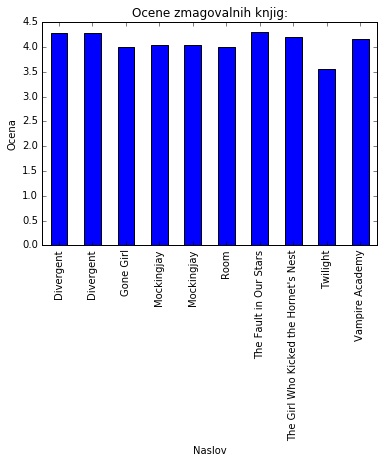

In [20]:
skupni['Ocena'].plot(kind='bar',title = 'Ocene zmagovalnih knjig:').set_ylabel('Ocena')

Iz grafa vidimo, da se ocene knjig vrtijo okoli ocene 4.0. 